In [1]:
# sprawozdanie na za 2 tygodnie( 23 marca do pory zajęć)
# zerowanie w sposób jawny wyrazów w macierzy
# partial pivoting - szukanie elementu wiodącego w kolumnie
# full pivoting - j.w. tylko że również w wierszach
# scaling - scalowanie każdego wiersza macierzy przez rząd wielkości n.p
# bez pivotingu, scaling można (pivot w domu)
# do 3 ważny rysunek. Im lepszy tym lepiej
# ryswanie grafów
# sprawdzanie czy sumy prądów na węzłach się zgadzają
# układ równań normalnych
# Kirchoff na lepszą ocenę
import numpy as np
from scipy import linalg
import time
import copy

#### Metoda Gaussa-Jordana

In [2]:

def scaling(matrix):
    max_order = -np.inf;
    for j in  range(np.size(matrix, 0)):
        max_order = -np.inf;
        for i in range(np.size(matrix, 1)):
            order = np.floor(np.log10(abs(matrix[j][i])))
            if order > max_order:
                max_order = order

        matrix[j][:] = matrix[j][:] / (10**max_order)


def partial_pivoting(matrix, row):
    max_num = -np.inf
    index = row

    for i in range(row, np.size(matrix, 0)):
        if matrix[i][row] > max_num:
            max_num = matrix[i][row]
            index = i
    
    tmp = copy.deepcopy(matrix[row][:])
    matrix[row][:] = matrix[index][:]
    matrix[index][:] = tmp
    
    P = np.identity(np.size(matrix, 0))
    tmp = copy.deepcopy(P[index][:])
    P[index, :] = P[row][:]
    P[row][:] = tmp
    
    return P


def Gauss_Jordan(matrix_A, matrix_b):
    matrix = np.column_stack((matrix_A, matrix_b))
    scaling(matrix)
    
    for p in range(np.size(matrix, 0)):
        partial_pivoting(matrix, p)
        pivot = matrix[p][p]
        for row in range(np.size(matrix,0)):
            if row != p and pivot !=0:
                row_sub = -matrix[p, :]*(matrix[row][p]/pivot)
                matrix[row, :] = matrix[row,:] + row_sub
                matrix[row, p] = 0
    
    return matrix


def find_solution(matrixA, matrixB):
    matrix = Gauss_Jordan(matrixA, matrixB)
    x = []
    
    size = np.size(matrixA, 0)
    for i in range(size):
        x.append(matrix[i][size]/matrix[i][i])
        
    return x


for i in range(1, 5):
    matrixA = np.random.rand(i*500, i*500)
    matrixb = np.random.rand(i*500)
    
    start = time.time()
    matrix = find_solution(matrixA, matrixb)
    end = time.time()
    elapsed = end-start

    start2 = time.time()
    matrix_2 = np.linalg.solve(matrixA, matrixb)
    end2 = time.time()
    elapsed2 = end2-start2

    start3 = time.time()
    matrix_3 = np.linalg.lstsq(matrixA, matrixb)
    end3 = time.time()
    elapsed3 = end3-start3
    
    print("Times for size = " + str(i*500))
    print("Time taken for written function: " + str(elapsed) + " s")
    print("Time taken for library function linalg.solve: " + str(elapsed2) + " s")
    print("Time taken for library function linalg.lstsq: " + str(elapsed3) + " s")
    # print("Result of written function:\n" + str(matrix))
    # print("Result of linalg.solve function:\n" + str(matrix_2))
    # print("Result of linalg.lstsq function:\n" + str(matrix_3))

C:\Users\pastu\Anaconda3\lib\site-packages\ipykernel_launcher.py:76: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Times for size = 500
Time taken for written function: 5.353967189788818 s
Time taken for library function linalg.solve: 0.14580321311950684 s
Time taken for library function linalg.lstsq: 0.12838172912597656 s
Times for size = 1000
Time taken for written function: 22.855604887008667 s
Time taken for library function linalg.solve: 0.08116483688354492 s
Time taken for library function linalg.lstsq: 0.32978224754333496 s
Times for size = 1500
Time taken for written function: 56.88107085227966 s
Time taken for library function linalg.solve: 0.05980110168457031 s
Time taken for library function linalg.lstsq: 1.353142499923706 s
Times for size = 2000
Time taken for written function: 110.66733145713806 s
Time taken for library function linalg.solve: 0.1882925033569336 s
Time taken for library function linalg.lstsq: 3.273648262023926 s


#### Rozkład LU

In [3]:
import scipy
# from scipy import linalg
import numpy as np
import time
import copy

def LU_decomposition(matrix):
    m_size = np.size(matrix, 0)
    L = np.identity(m_size)
    L_I = []
    U = copy.deepcopy(matrix)
    P = np.identity(m_size) 
    P_i = []
    scaling(U)
    
    for p in range(m_size):
        P_i = partial_pivoting(U, p)
        P = P_i@P
    
    for p in range(m_size):
        pivot = U[p][p]
        for row in range(p+1,m_size):
            l = (U[row][p]/pivot)
            row_sub = -U[p, :]*l
            U[row, :] = U[row,:] + row_sub
            U[row, p] = 0
            L[row, p] = l
    
    return (L,U,P)


matrixA = np.random.rand(5, 5)*5000

start10 = time.time()
L, U, P = LU_decomposition(matrixA)
end10 = time.time()
elaps = end10 - start10
print("Time taken for written function: " + str(elaps))
start20 = time.time()
P1, L1, U1 = scipy.linalg.lu(matrixA, permute_l=False)
end20 = time.time()
elaps20 = end20 - start20
print("Time taken for library function: " + str(elaps20))
print("Matrix L:\n" + str(P@L))
print("Matrix L from numpy:\n" + str(P1@L1))
print("Original matrix A:\n" + str(matrixA))
print("Matrix A from LU:\n" + str(P@L@U))
print("Matrix A from LU scipy:\n" + str(P1@L1@U1))
print("Permutation matrix:\n" + str(P))
print("Permutation matrix from numpy:\n" + str(P1))


Time taken for written function: 0.005221843719482422
Time taken for library function: 0.00458526611328125
Matrix L:
[[ 0.09950101  0.50680218 -0.14226202  0.88138862  1.        ]
 [ 0.96483926 -0.46327204 -0.72588544  1.          0.        ]
 [ 0.09865894 -0.06951005  1.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]
 [ 0.17693463  1.          0.          0.          0.        ]]
Matrix L from numpy:
[[ 0.96483926 -0.46327204 -0.72588544  1.          0.        ]
 [ 0.09950101  0.50680218 -0.14226202  0.88138862  1.        ]
 [ 0.09865894 -0.06951005  1.          0.          0.        ]
 [ 0.17693463  1.          0.          0.          0.        ]
 [ 1.          0.          0.          0.          0.        ]]
Original matrix A:
[[4821.20193342 3370.10426216  447.72507263 1808.26894224 1419.43702341]
 [ 497.19625885 1910.59430814  533.94168184 1472.33834913 3576.24639554]
 [ 492.98853371  282.21153032 4779.47820489 3376.06164987 2831.12

#### Analiza obwodu elektrycznego

In [4]:
# A nie metoda prądów oczkowych? I tak trzeba prądy wyliczyć, a fakt, że na wejściu jest źródło napięciowe bardziej pasuje do metody oczkowej
# Liczba węzłów do metody węzłowej: n-2 (jeden jako masa, drugi ma wartość źródła napięciowego).

# elem on 0 position - no of vertices
def read_graph_from(file_name):
    graph = []
    f = open(file_name, "r")
    lines = f.readlines()
    
    for l in lines:
        s = l.split()
        if(len(s) < 1): continue
        if( s[0] == "v" ):
            V = int(s[2])
            # graph.append(V)
            for i in range(V):
                graph.append([])
        elif( s[0] == "e" ):
            a, b, c = int(s[1]), int(s[2]), int(s[3])
            graph[a-1].append((b-1,c))
            graph[b-1].append((a-1, c))

    return graph
    
    f.close()
    return 0


def nodal_analysis(graph, s, t, E):
    size = np.size(graph, 0)
    circuit = graph[:s] + graph[s+1:]
    circuit = circuit[:t-1] + circuit[t:]
    G = np.zeros((size-2, size-2))
    V = [] # szukany wektor
    I = np.zeros(size-2)
    
    print("Circuit:\n" + str(circuit))
    print("Size: " + str(size))
    print("G matrix:\n" + str(G))
    print("I matrix:\n" + str(I))
    
    for node1 in range(size-2):
        for node2 in range(size-2):
            weight = 0
            if node1 == node2:
                for path in graph[node1]:
                    weight += 1/(path[1])
            else:
                for path in graph[node1]:
                    if path[0] == node2:
                        weight += 1/path[1]
            G[node1][node2] = weight
    
    return np.linalg.solve(G, I)
    
    print("G matrix:\n" + str(G))

graph = read_graph_from("test.txt")
result = nodal_analysis(graph, 1, 6, 10)
print(graph)
print(result)

Circuit:
[[(1, 1)], [(1, 1), (3, 1)], [(2, 1), (4, 1)], [(3, 1), (5, 1)], [(4, 1)]]
Size: 6
G matrix:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
I matrix:
[0. 0. 0. 0.]
[[(1, 1)], [(0, 1), (2, 1)], [(1, 1), (3, 1)], [(2, 1), (4, 1)], [(3, 1), (5, 1)], [(4, 1)]]
[0. 0. 0. 0.]


#### Graficzne przedstawienie obwodu elektrycznego

In [21]:
import ipywidgets
from ipycanvas import Canvas
from IPython.display import HTML, display
#from IPython import html
#from IPython.html.widgets.interaction import interact

html1='<svg height="200" width="200"> \
    <circle cx="100" cy="50" r="40" stroke="black" stroke-width="3" fill="red" /> \
    <rect x="25" y="25" width="50" height="50" stroke="orange" stroke-width="3" fill="blue" />\
    </svg>'
display(HTML(html1))
html1 = '<svg height="200" width="200"> \
    <circle cx="100" cy="50" r="40" stroke="black" stroke-width="3" fill="red" /> \
    </svg>'
display(HTML(html1))

def draw_circuit(graph):
    print(0)
    return 0


n_particles = 100_000

# out = widgets.Output(layout={'border': '1px solid black'})


x = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
y = np.array(np.random.rayleigh(250, n_particles), dtype=np.int32)
size = np.random.randint(1, 3, n_particles)

canvas = Canvas(width=800, height=500)

canvas.fill_style = 'green'
canvas.fill_rects(x, y, size)

display(canvas)

Canvas(width=800)

1 (1, 1)
2 (2, 2)
3 (1, 0)


{1: Text(1.1, 1.1, 'V1: 10V'),
 2: Text(2.1, 2.1, 'V2: 20 V'),
 3: Text(1.1, 0.1, 'V3')}

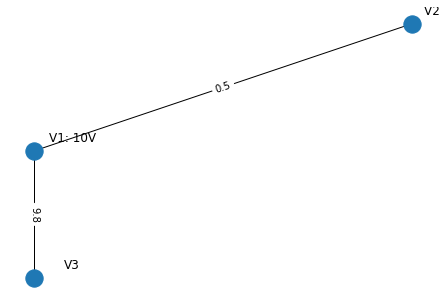

In [48]:
import networkx as nx
import matplotlib.pyplot as plt

list = [(1, 2, 10), (2, 3, 20), (3, 1, 50)]
#G = nx.Graph()
#G.add_weighted_edges_from(list)
#plt.subplot(121)
#pos=nx.get_node_attributes(G,'pos')
#nx.draw(G) # default spring_layout
#labels = nx.get_edge_attributes(G,'weight')
#print(labels)
#nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#plt.subplot(122)
#nx.draw(G, pos=nx.circular_layout(G), node_color='r', edge_color='b')

G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G,pos)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
labels_node = {1:"V1: 10V", 2:"V2: 20 V", 3: "V3"}
pos2 = {}
for key, val in pos.items():
    print(str(key) + " " + str(val))
    pos2[key] = (val[0]+0.1,val[1]+0.1)
nx.draw_networkx_labels(G, pos2, labels=labels_node)